<a href="https://colab.research.google.com/github/Dennieeeee/KPMG-Customer-Analytics-Project/blob/master/Early_EDA_and_Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview:
This dataset contains variables gender, transaction_date, online_order order_status, brand, product_line, product_class, product_size, list_price,  standard_cost.

Business question is to target the right customer for each brand.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from pylab import rcParams

# Fit the ARIMA model
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot

from pandas import read_csv
import statsmodels
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#this is the new dataset created from the previous file
#current and past customer list
df = pd.read_csv('https://raw.githubusercontent.com/Dennieeeee/KPMG-Customer-Analytics-Project/master/Data/KPMG_new_data.csv')

In [3]:
#new customer list
new = pd.read_csv('https://raw.githubusercontent.com/Dennieeeee/KPMG-Customer-Analytics-Project/master/Data/NewCustomerList.csv')

# Preparing the Dataset

In [4]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'name', 'Year'],
      dtype='object')

In [5]:
print(df.iloc[:,[2,4]].head())

   customer_id  online_order
0         3120           1.0
1         3120           0.0
2         3120           1.0
3         3120           0.0
4         3120           1.0


In [6]:
df.shape

(10203, 28)

In [7]:
new.head(1)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6.0,0.57,0.7125,0.890625,0.757031,1,1,1.71875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
new.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=256)

In [9]:
features_drop = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Unnamed: 19', 'Unnamed: 20']
new = new.drop(features_drop, axis=1)

### Data Cleansing
- Age
- Keep data in State and Gender consistent
     - Rename the data in gender and state
     - Replace F and Femal to Female; M to Male; VIC to Victoria

In [10]:
#convert DOB to datetime
new['DOB'] = pd.to_datetime(new['DOB'])

In [11]:
#convert transaction date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [12]:
#convert DOB data type to datetime
df['DOB'] = pd.to_datetime(df['DOB'])
df['year'] = df['DOB'].dt.year

df1 = df[df["year"] > 1941]
#According to Google, the average human lifespan is 79 year old.
#It makes more sense to target customers who are more likely are still alive
#Remove the customers with age over 79.

In [13]:
df1['year'].max()

2001

In [14]:
df1['gender'].value_counts()

Female    5186
Male      5017
Name: gender, dtype: int64

In [15]:
df1['gender'] = df1['gender'].replace({'F':'Female','M':'Male','Femal':'Female'})

In [16]:
df1['gender'].value_counts()

Female    5186
Male      5017
Name: gender, dtype: int64

In [17]:
#subset data to people born between 2000 to 1970: age of 20 to 50 
df1 = df1[(df1['year'] >= 1970) & (df1['year'] <= 2000)]
print(df1.shape)

(10075, 29)


In [18]:
df1.head(1)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,postcode,state,country,property_valuation,name,Year,year
0,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,4 Shopko Circle,2196,NSW,Australia,5,Lauree O'Donnell,1979.0,1979


In [19]:
print(df1['online_order'].value_counts())
print()
print(df1['brand'].value_counts())
print()
print(df1['product_line'].value_counts())
print()
print(df1['product_class'].value_counts())
print()
print(df1['job_title'].value_counts())
print()
print(df1['job_industry_category'].value_counts())
print()
print(df1['wealth_segment'].value_counts())
print()
print(df1['deceased_indicator'].value_counts())
print()
print(df1['owns_car'].value_counts())
print()
print(df1['state'].value_counts())
print()
print(df1['country'].value_counts())

1.0    4979
0.0    4931
Name: online_order, dtype: int64

Solex             2182
Giant Bicycles    1632
WeareA2B          1600
OHM Cycles        1539
Trek Bicycles     1531
Norco Bicycles    1492
Name: brand, dtype: int64

Standard    7138
Road        2029
Touring      590
Mountain     219
Name: product_line, dtype: int64

medium    6940
high      1550
low       1486
Name: product_class, dtype: int64

Nuclear Power Engineer       167
Social Worker                155
Research Nurse               144
Registered Nurse             140
Tax Accountant               136
                            ... 
Programmer Analyst I           6
Media Manager II               5
Database Administrator II      5
Software Test Engineer II      5
Geologist II                   2
Name: job_title, Length: 192, dtype: int64

Financial Services    2475
Manufacturing         2429
Health                1889
Retail                1072
Property               753
Entertainment          437
IT                     424

In [20]:
#change VIC to Victoria in state
df1['state'] = df1['state'].replace({'VIC':'Victoria'})

In [21]:
df1['state'].value_counts()

NSW                5214
Victoria           2338
QLD                2291
New South Wales     232
Name: state, dtype: int64

In [22]:
#sample size of online order: Yes and No
online_order_yes = df1.loc[df1['online_order']==1]
online_order_no = df1.loc[df1['online_order']==0]
print(online_order_yes.shape,online_order_no.shape)

(4979, 29) (4931, 29)


In [23]:
#sample size of female and male guests
female = df1.loc[df1['gender']=='Female']
male = df1.loc[df1['gender']=='Male']
print(female.shape,male.shape)

(5121, 29) (4954, 29)


In [24]:
df1['gender'].value_counts()

Female    5121
Male      4954
Name: gender, dtype: int64

In [25]:
df1.groupby('gender').agg({'list_price':'mean'})

,list_price
gender,
Female,1100.097327
Male,1116.558492


In [26]:

#online itmes are cheaper
df1.groupby('online_order').agg({'list_price':'mean'})

,list_price
online_order,
0.0,1111.181460
1.0,1104.322677


In [27]:
men = df1.loc[df1['gender'] == 'Male']
women = df1.loc[df1['gender'] == 'Female']

In [28]:
#create a new column: age
df1['age'] = round(2020 - df1['year'])

In [29]:
print('The minimum age is: ',df1['age'].min(), 'The maximum age is: ', df1['age'].max())

The minimum age is:  20 The maximum age is:  49


In [30]:
hist(df1['age'])

In [31]:
df1.to_csv('New_KPMG_Data.csv',index=False)

# Descriptive Statistics AND Exploratory Data Analysis


Questions: 
1. Do men have higher buying power than women?
2. What's the most popular brand among the two groups: women and men?
3. What's the most popular brand among the women and men who have high power?
4. How wealth segment influenced the sales volumne of each brand?

- Note: list_price higher than the mean is considered as high buying power
- the average list price is 1108

In [32]:
df1.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'name', 'Year', 'year', 'age'],
      dtype='object')

###Which group has the highest buying power?

In [33]:
#split the df1 into groups: male and female
male = df1[df1['gender']=='Male']
female=df1[df1['gender']=='Female']

In [34]:
#split the df1 into two groups with high buying power
male1 = df1[(df1.gender == 'Male') & (df1.list_price > 1108)]
female1 = df1[(df1.gender == 'Female') & (df1.list_price > 1108)]

In [35]:
print (np.shape(male1), np.shape(male))

(2662, 30) (4954, 30)


In [36]:
print (np.shape(female1), np.shape(female))

(2706, 30) (5121, 30)


In [37]:
#people who have the high buying power among the entire dataset
df2 = df1[df1.list_price > 1108]

In [38]:
print ('The rate of people with high buying power is: ',
    int(len(df2) / float(len(df1)) * 100), '%.')
print('The rate of men with high buying power is: ',
      int(len(male1)/float(len(male)) * 100), '%,')
print('The rate of female with high buying power is: ',
      int(len(female1)/float(len(female)) * 100), '%,')

The rate of people with high buying power is:  53 %.
The rate of men with high buying power is:  53 %,
The rate of female with high buying power is:  52 %,


###What's the most popular brand among all the people regardless of their buying power.

In [39]:
df1['brand'].value_counts()

Solex             2182
Giant Bicycles    1632
WeareA2B          1600
OHM Cycles        1539
Trek Bicycles     1531
Norco Bicycles    1492
Name: brand, dtype: int64

In [40]:
solex = df1[df1.brand == 'Solex']
giant_bicycles = df1[df1.brand == 'Giant Bicycles']
weareA2B = df1[df1.brand == 'WeareA2B']
OHM_cycles = df1[df1.brand == 'OHM Cycles']
trek_bicycles = df1[df1.brand == 'Trek Bicycles']
norco_bicycles = df1[df1.brand == 'Norco Bicycles']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


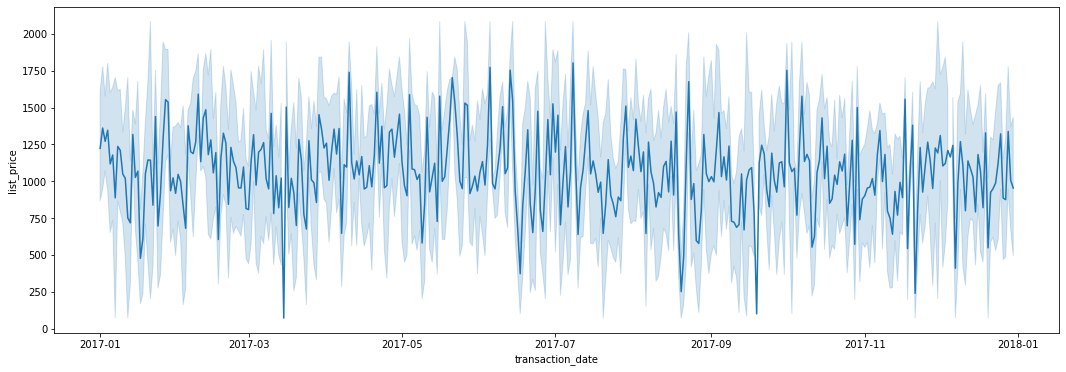

In [41]:
plt.figure(figsize=(18,6))
sns.lineplot('transaction_date','list_price',data=solex)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


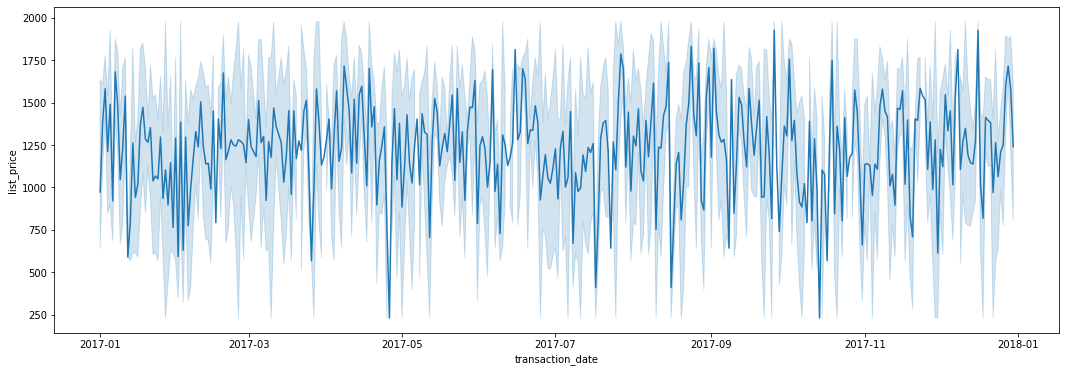

In [42]:
plt.figure(figsize=(18,6))
sns.lineplot('transaction_date','list_price',data=giant_bicycles)

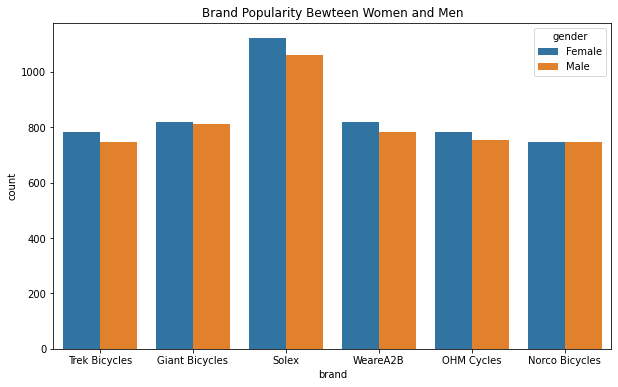

In [43]:
plt.figure(figsize=(10,6))
plt.title('Brand Popularity Bewteen Women and Men')
sns.countplot(x='brand',hue='gender',data=df1)

In [44]:
print ('The rate of Solex is: ', round((len(solex)/len(df1))*100,2), '%. This is the most popular brand among all the people')
print ('The rate of Giant Bicycles is: ', round(len(giant_bicycles)/len(df1)*100,2), '%.')
print ('The rate of WeareA2B is: ',
       round(len(weareA2B)/len(df1)*100,2), '%.')
print ('The rate of OHM Cycles is: ',
       round(len(OHM_cycles)/len(df1)*100,2), '%.')
print ('The rate of Trek Bicycles is: ',
       round(len(trek_bicycles)/len(df1)*100,2), '%.')
print ('The rate of Norco Bicycles is: ',
       round(len(norco_bicycles)/len(df1)*100,2), '%.')

The rate of Solex is:  21.66 %. This is the most popular brand among all the people
The rate of Giant Bicycles is:  16.2 %.
The rate of WeareA2B is:  15.88 %.
The rate of OHM Cycles is:  15.28 %.
The rate of Trek Bicycles is:  15.2 %.
The rate of Norco Bicycles is:  14.81 %.


In [45]:
#find the most popular brand between women and men of the entire dataset
#Solex
solex_m = solex[solex.gender == 'Male']
solex_f = solex[solex.gender == 'Female']
#Giant Bicycles
giant_bicycles_m = giant_bicycles[giant_bicycles.gender == 'Male']
giant_bicycles_f = giant_bicycles[giant_bicycles.gender == 'Female']
#WeareA2B
weareA2B_m = weareA2B[weareA2B.gender == 'Male']
weareA2B_f = weareA2B[weareA2B.gender == 'Female']
#OHM_cycles
OHM_cycles_m = OHM_cycles[OHM_cycles.gender == 'Male']
OHM_cycles_f = OHM_cycles[OHM_cycles.gender == 'Female']
#trek bicycles
trek_bicyles_m = trek_bicycles[trek_bicycles.gender == 'Male']
trek_bicyles_f = trek_bicycles[trek_bicycles.gender == 'Female']
#Norco Bicycles
norco_bicycles_m = norco_bicycles[norco_bicycles.gender == 'Male']
norco_bicycles_f = norco_bicycles[norco_bicycles.gender == 'Female']

In [46]:
print('The percent of men like Solex is: ', round(len(solex_m)/len(solex)*100,2), '%.')
print('The percent of women like Solex is: ', round(len(solex_f)/len(solex)*100,2), '%.')
print ('More women like Solex than men.')

The percent of men like Solex is:  48.63 %.
The percent of women like Solex is:  51.37 %.
More women like Solex than men.


In [47]:
#
print('The percent of men like Giant Bicycles is: ', round(len(giant_bicycles_m)/len(giant_bicycles)*100,2), '%.')
print('The percent of women like Giant Bicycles is: ', round(len(giant_bicycles_f)/len(giant_bicycles)*100,2), '%.')
print ('More women like Giant Bicycles than men.')


The percent of men like Giant Bicycles is:  49.82 %.
The percent of women like Giant Bicycles is:  50.18 %.
More women like Giant Bicycles than men.


In [48]:
print('The percent of men like WeareA2B is: ', round(len(weareA2B_m)/len(weareA2B)*100,2), '%.')
print('The percent of women like WeareA2B is: ', round(len(weareA2B_f)/len(weareA2B)*100,2), '%.')
print ('More women like WeareA2B than men.')


The percent of men like WeareA2B is:  48.81 %.
The percent of women like WeareA2B is:  51.19 %.
More women like WeareA2B than men.


In [49]:
#
print('The percent of men like OHM Cycles is: ', round(len(OHM_cycles_m)/len(OHM_cycles)*100,2), '%.')
print('The percent of women like OHM Cycles is: ', round(len(OHM_cycles_f)/len(OHM_cycles)*100,2), '%.')
print ('More women like OHM Cycles than men.')

The percent of men like OHM Cycles is:  49.06 %.
The percent of women like OHM Cycles is:  50.94 %.
More women like OHM Cycles than men.


In [50]:
print('The percent of men like Trek Bicycles is: ', round(len(trek_bicyles_m)/len(trek_bicycles)*100,2), '%.')
print('The percent of women like Trek Bicycles is: ', round(len(trek_bicyles_f)/len(trek_bicycles)*100,2), '%.')

The percent of men like Trek Bicycles is:  48.79 %.
The percent of women like Trek Bicycles is:  51.21 %.


In [51]:
print('The percent of men like Norco Bicycles is: ', round(len(norco_bicycles_m)/len(norco_bicycles)*100,2), '%.')
print('The percent of women like Norco Bicycles is: ', round(len(norco_bicycles_f)/len(norco_bicycles)*100,2), '%.')

The percent of men like Norco Bicycles is:  50.0 %.
The percent of women like Norco Bicycles is:  50.0 %.


###Among the people who have high buying power, what do they like to buy?

In [52]:
df2['brand'].value_counts()

WeareA2B          1164
Giant Bicycles    1147
Solex             1004
Trek Bicycles      736
OHM Cycles         672
Norco Bicycles     592
Name: brand, dtype: int64

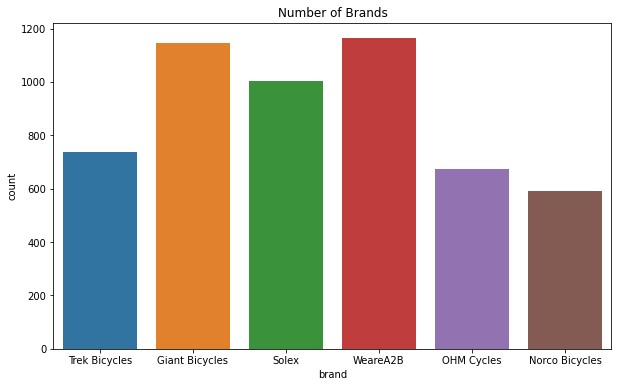

In [53]:
plt.figure(figsize=(10,6))
plt.title('Number of Brands')
sns.countplot(x='brand',data=df2)

In [54]:
df2_solex = df2[df2.brand == 'Solex']
df2_giant_bicycles = df2[df2.brand == 'Giant Bicycles']
df2_weareA2B = df2[df2.brand == 'WeareA2B']
df2_OHM_cycles = df2[df2.brand == 'OHM Cycles']
df2_trek_bicycles = df2[df2.brand == 'Trek Bicycles']
df2_norco_bicycles = df2[df2.brand == 'Norco Bicycles']

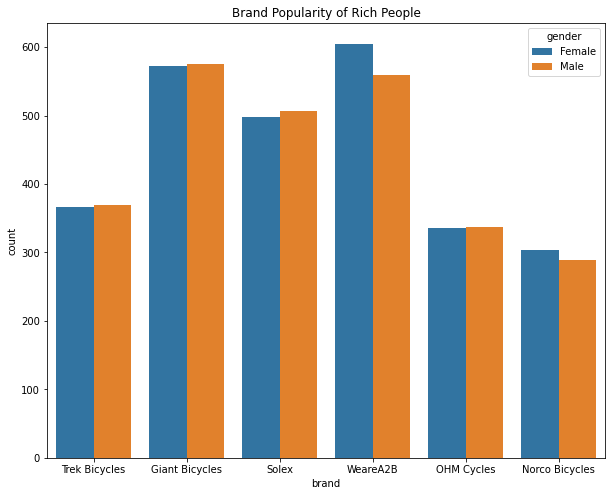

In [55]:
plt.figure(figsize=(10,8))
plt.title('Brand Popularity of Rich People')
sns.countplot(x='brand',hue='gender',data=df2)

In [56]:
#find the most popular brand between women and men of people who have high buying power
#Solex
df2_solex_m = df2_solex[df2_solex.gender == 'Male']
df2_solex_f = df2_solex[df2_solex.gender == 'Female']
#Giant Bicycles
df2_giant_bicycles_m = df2_giant_bicycles[df2_giant_bicycles.gender == 'Male']
df2_giant_bicycles_f = df2_giant_bicycles[df2_giant_bicycles.gender == 'Female']
#WeareA2B
df2_weareA2B_m = df2_weareA2B[df2_weareA2B.gender == 'Male']
df2_weareA2B_f = df2_weareA2B[df2_weareA2B.gender == 'Female']
#OHM_cycles
df2_OHM_cycles_m = df2_OHM_cycles[df2_OHM_cycles.gender == 'Male']
df2_OHM_cycles_f = df2_OHM_cycles[df2_OHM_cycles.gender == 'Female']
#trek bicycles
df2_trek_bicyles_m = df2_trek_bicycles[df2_trek_bicycles.gender == 'Male']
df2_trek_bicyles_f = df2_trek_bicycles[df2_trek_bicycles.gender == 'Female']
#Norco Bicycles
df2_norco_bicycles_m = df2_norco_bicycles[df2_norco_bicycles.gender == 'Male']
df2_norco_bicycles_f = df2_norco_bicycles[df2_norco_bicycles.gender == 'Female']

In [57]:
#solex
print('The percent of men purchased Solex is: ', round(len(df2_solex_m)/len(df2_solex)*100,2), '%.')
print('The percent of women purchased Solex is: ', round(len(df2_solex_f)/len(df2_solex)*100,2), '%.')
print ('More men purchased Giant Bicycles than women.')

The percent of men purchased Solex is:  50.4 %.
The percent of women purchased Solex is:  49.6 %.
More men purchased Giant Bicycles than women.


In [58]:
#Giant Bicycles
print('The percent of men like Giant Bicycles is: ', round(len(df2_giant_bicycles_m)/len(df2_giant_bicycles)*100,2), '%.')
print('The percent of women like Giant Bicycles is: ', round(len(df2_giant_bicycles_f)/len(df2_giant_bicycles)*100,2), '%.')
print ('More men purchased Giant Bicycles than women.')

The percent of men like Giant Bicycles is:  50.13 %.
The percent of women like Giant Bicycles is:  49.87 %.
More men purchased Giant Bicycles than women.


In [59]:
#WeareA2B
print('The percent of men like WeareA2B is: ', round(len(df2_weareA2B_m)/len(df2_weareA2B)*100,2), '%.')
print('The percent of women like WeareA2B is: ', round(len(df2_weareA2B_f)/len(df2_weareA2B)*100,2), '%.')
print ('More women purchased WeareA2B than men.')

The percent of men like WeareA2B is:  48.02 %.
The percent of women like WeareA2B is:  51.98 %.
More women purchased WeareA2B than men.


In [60]:
#OHM Cycles
print('The percent of men like OHM Cycles is: ', round(len(df2_OHM_cycles_m)/len(df2_OHM_cycles)*100,2), '%.')
print('The percent of women like OHM Cycles is: ', round(len(df2_OHM_cycles_f)/len(df2_OHM_cycles)*100,2), '%.')
print ('More women like OHM Cycles than men.')

The percent of men like OHM Cycles is:  50.15 %.
The percent of women like OHM Cycles is:  49.85 %.
More women like OHM Cycles than men.


In [61]:
#Trek Bicycles
print('The percent of men like Trek Bicycles is: ', round(len(df2_trek_bicyles_m)/len(df2_trek_bicycles)*100,2), '%.')
print('The percent of women like Trek Bicycles is: ', round(len(df2_trek_bicyles_f)/len(df2_trek_bicycles)*100,2), '%.')
print ('More men like Trek Bicycles than women.')

The percent of men like Trek Bicycles is:  50.14 %.
The percent of women like Trek Bicycles is:  49.86 %.
More men like Trek Bicycles than women.


In [62]:
#Norco Bicycles
print('The percent of men like Norco Bicycles is: ', round(len(df2_norco_bicycles_m)/len(df2_norco_bicycles)*100,2), '%.')
print('The percent of women like Norco Bicycles is: ', round(len(df2_norco_bicycles_f)/len(df2_norco_bicycles)*100,2), '%.')
print ('More women like Norco Bicycles than men.')

The percent of men like Norco Bicycles is:  48.82 %.
The percent of women like Norco Bicycles is:  51.18 %.
More women like Norco Bicycles than men.


### How's Wealth Segment Affecting the Buying Power?
Do different wealth segment influence customer's ability to buy stuff?

In [63]:
df1['wealth_segment'].value_counts()

Mass Customer        4981
High Net Worth       2589
Affluent Customer    2505
Name: wealth_segment, dtype: int64

In [64]:
mass = df1[df1['wealth_segment'] == 'Mass Customer']
high = df1[df1['wealth_segment'] == 'High Net Worth']
affluent = df1[df1['wealth_segment'] == 'Affluent Customer'] 

In [65]:
mass_m = mass[mass['gender'] == 'men']
mass_f = mass[mass['gender'] == 'women']

high_m = high[high['gender'] == 'men']
high_f = high[high['gender'] == 'women']

affluent_m = affluent[affluent['gender'] == 'men']
affluent_f = affluent[affluent['gender'] == 'women']

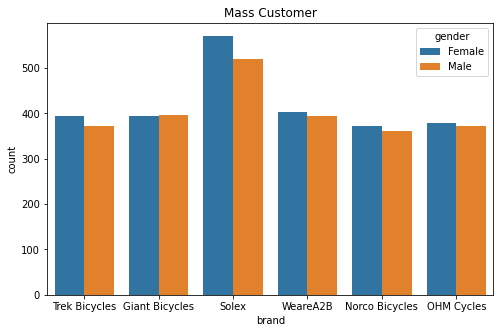

In [66]:
plt.figure(figsize=(8,5))
plt.title('Mass Customer')
sns.countplot(x='brand',hue='gender',data=mass) #mass customer only

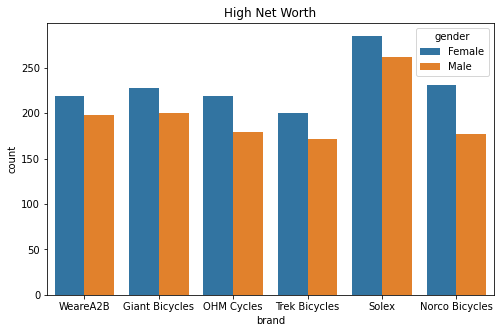

In [67]:
plt.figure(figsize=(8,5))
plt.title('High Net Worth')
sns.countplot(x='brand',hue='gender',data=high) #High Net Worth customer only

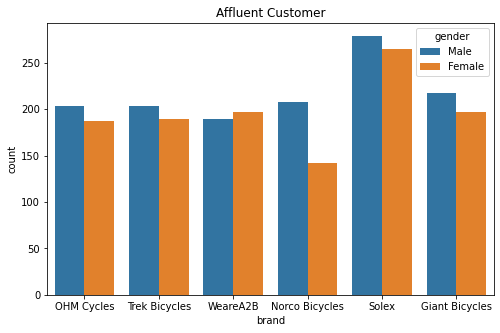

In [68]:
plt.figure(figsize=(8,5))
plt.title('Affluent Customer')
sns.countplot(x='brand',hue='gender',data=affluent) #Affluent customer only

#Conclusion
Generally, men have higher buying power than women. However, if we don't consider who has higher buying power, women are more likely to buy all brands than men. If we want to target people who have the high buying power, their favorite brand is WearA2B. Women who has high buying power like all brands except slight off on Solex. Men who have high buying power tend to buy Solex.


## New Customer data

In [69]:
new['year'] = new['DOB'].dt.year

In [70]:
new = new[new['year'] >= 1970]
new = new[new['year'] <= 2000]

In [71]:
new['DOB'].max()

Timestamp('2000-12-09 00:00:00')

In [72]:
new['name'] = new['first_name'] + ' ' + new['last_name']

In [73]:
ax = new.sort_values(by='past_3_years_bike_related_purchases',ascending=False)
ax[['name','gender','past_3_years_bike_related_purchases']].head(10)

,name,gender,past_3_years_bike_related_purchases
748,Mikol Eck,Male,99
272,Theresa Cowper,Female,99
546,Sammy Borsi,Female,99
359,Pace Clemonts,Male,99
652,Leticia Hovenden,Female,98
931,Kizzee Agget,Female,98
75,Hasheem Groucock,Male,98
783,Calhoun Mussington,Male,98
683,Selle Casper,Female,98
421,Etan Prinett,Male,97


In [74]:
ax = new.sort_values(by='past_3_years_bike_related_purchases')
ax[['name','gender','past_3_years_bike_related_purchases']].head()

,name,gender,past_3_years_bike_related_purchases
798,Cherye Stanfield,Female,0
113,Meriel Tapp,Female,0
545,Katy Crooke,Female,0
225,Hersh Stubbert,Male,0
451,Katie Warhurst,Female,0


# Data Model Development

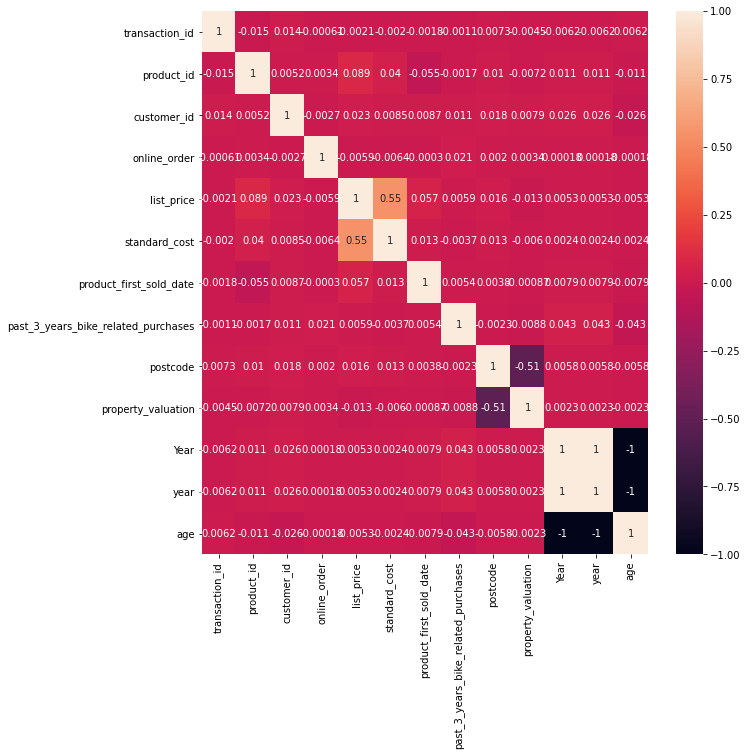

In [75]:
plt.figure(figsize=(10,10))
corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()